In [38]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [39]:
dataset = pd.read_csv('./data/주차예측(한맥+다래)_정기권.csv')
dataset['일시'] = pd.to_datetime(dataset['일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [40]:
dataset.head()

,일시,주차장,입차대수,출차대수,입출차 차이,입출차 누계,차량구분,연,월,일,시각,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,2020-10-01 00:00:00,"주차1동, 주차2동",0.0,0.0,0.0,96.0,정기권,2020,10,1,0,17.3,0.0,0.2,92.0,0.0
1,2020-10-01 01:00:00,"주차1동, 주차2동",0.0,0.0,0.0,96.0,정기권,2020,10,1,1,16.8,0.0,0.5,94.0,0.0
2,2020-10-01 02:00:00,"주차1동, 주차2동",0.0,0.0,0.0,96.0,정기권,2020,10,1,2,16.9,0.0,1.1,93.0,0.0
3,2020-10-01 03:00:00,"주차1동, 주차2동",0.0,0.0,0.0,96.0,정기권,2020,10,1,3,16.8,0.0,0.4,94.0,0.0
4,2020-10-01 04:00:00,"주차1동, 주차2동",0.0,0.0,0.0,96.0,정기권,2020,10,1,4,16.1,0.0,0.1,95.0,0.0


# 데이터 전처리

In [41]:
# 대체 휴일은 따로 지정해 줘야함
import holidays
kr_holidays = holidays.KR()

In [42]:
def holiday_check(x):
    if x in kr_holidays:
        return 1
    else :
        return 0

In [43]:
dataset['공휴일']= dataset['일시']
dataset['공휴일'] = dataset['공휴일'].apply(holiday_check)
dataset['요일'] = dataset['일시'].dt.weekday
dataset = dataset[dataset['주차장']!='주차1동, 주차2동']
arr = list(dataset['주차장'].unique())

In [44]:
dataset

,일시,주차장,입차대수,출차대수,입출차 차이,입출차 누계,차량구분,연,월,일,시각,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),공휴일,요일
16800,2022-09-01 00:00:00,14동,0.0,0.0,0.0,540.0,NaN,2022,9,1,0,19.4,0.0,0.5,96.0,0.0,0,3
16801,2022-09-01 00:00:00,12동,0.0,0.0,0.0,0.0,NaN,2022,9,1,0,19.4,0.0,0.5,96.0,0.0,0,3
16802,2022-09-01 00:00:00,15동,0.0,0.0,0.0,0.0,NaN,2022,9,1,0,19.4,0.0,0.5,96.0,0.0,0,3
16803,2022-09-01 00:00:00,13동,0.0,0.0,0.0,0.0,NaN,2022,9,1,0,19.4,0.0,0.5,96.0,0.0,0,3
16805,2022-09-01 01:00:00,15동,0.0,0.0,0.0,0.0,NaN,2022,9,1,1,19.3,0.0,0.1,96.0,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20394,2022-09-30 22:00:00,15동,0.0,0.0,0.0,55.0,NaN,2022,9,30,22,17.0,0.0,0.0,71.0,0.0,0,4
20395,2022-09-30 23:00:00,14동,0.0,0.0,0.0,0.0,NaN,2022,9,30,23,16.3,0.0,0.0,75.0,0.0,0,4
20396,2022-09-30 23:00:00,12동,0.0,0.0,0.0,1434.0,NaN,2022,9,30,23,16.3,0.0,0.0,75.0,0.0,0,4
20397,2022-09-30 23:00:00,15동,0.0,0.0,0.0,55.0,NaN,2022,9,30,23,16.3,0.0,0.0,75.0,0.0,0,4


[I 2022-11-23 13:25:13,092] A new study created in memory with name: no-name-0ad7a807-b055-4a7f-bf2e-eb495947c7ef
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:16,835] Trial 0 finished with value: 642.5942258925044 and parameters: {'max_depth': 10, 'num_leaves': 784, 'min_child_samples': 9, 'learning_rate': 0.0730133057156183, 'reg_alpha': 0.3872874692570784, 'reg_lambda': 0.8309526071596414, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 8}. Best is trial 0 with value: 642.5942258925044.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:18,159] Trial 1 finished with value: 498.4389152269517 and parameters: {'max_depth': 25, 'num_leaves': 891, 'min_child_samples': 30, 'learning_rate': 0.03295583676476455, 'reg_alpha': 0.5081486979354541, 'reg_lambda': 0.5413521471381952, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 8}. Best is trial 1 with value: 498.4389152269517.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:25:21,264] Trial 2 finished with value: 667.0292188376021 and parameters: {'max_depth': 12, 'num_leaves': 201, 'min_child_samples': 17, 'learning_rate': 0.0743941758128422, 'reg_alpha': 0.013344000390649704, 'reg_lambda': 0.4822765763186499, 'gamma': 3, 'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 1 with value: 498.4389152269517.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:25:23,466] Trial 3 finished with value: 528.2868691771178 and parameters: {'max_depth': 15, 'num_leaves': 201, 'min_child_samples': 24, 'learning_rate': 0.010203178715596563, 'reg_alpha': 0.8148647259826531, 'reg_lambda': 0.2826888967055404, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.8, 'bagging_freq': 9}. Best is trial 1 with value: 498.4389152269517.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:25:25,127] Trial 4 finished with value: 634.9779992230772 and parameters: {'max_depth': 16, 'num_leaves': 61, 'min_child_samples': 36, 'learning_rate': 0.06446045570940202, 'reg_alpha': 0.2764179405728549, 'reg_lambda': 0.5290153205779285, 'gamma': 1, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 9}. Best is trial 1 with value: 498.4389152269517.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:25,850] Trial 5 finished with value: 481.6907843556074 and parameters: {'max_depth': 24, 'num_leaves': 632, 'min_child_samples': 45, 'learning_rate': 0.0609857961591687, 'reg_alpha': 0.3848677150560003, 'reg_lambda': 0.0314107805857639, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 5 with value: 481.6907843556074.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:25:26,707] Trial 6 finished with value: 466.9345636165092 and parameters: {'max_depth': 9, 'num_leaves': 409, 'min_child_samples': 49, 'learning_rate': 0.05784483912047794, 'reg_alpha': 0.33063269634074854, 'reg_lambda': 0.8007510797215127, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 6 with value: 466.9345636165092.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:25:27,974] Trial 7 finished with value: 585.9647315676226 and parameters: {'max_depth': 18, 'num_leaves': 735, 'min_child_samples': 38, 'learning_rate': 0.07085247586666985, 'reg_alpha': 0.037566800259162834, 'reg_lambda': 0.5322839628175103, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 12}. Best is trial 6 with value: 466.9345636165092.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:25:29,042] Trial 8 finished with value: 619.7517746853457 and parameters: {'max_depth': 4, 'num_leaves': 904, 'min_child_samples': 35, 'learning_rate': 0.06341970416146396, 'reg_alpha': 0.2446015452909403, 'reg_lambda': 0.6955426844395265, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 11}. Best is trial 6 with value: 466.9345636165092.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:25:30,209] Trial 9 finished with value: 572.5514239799901 and parameters: {'max_depth': 24, 'num_leaves': 399, 'min_child_samples': 47, 'learning_rate': 0.06802757654365958, 'reg_alpha': 0.12854738563030943, 'reg_lambda': 0.8694722524861402, 'gamma': 1, 'feature_fraction': 0.8, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 6 with value: 466.9345636165092.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:25:31,116] Trial 10 finished with value: 521.5035239127972 and parameters: {'max_depth': 4, 'num_leaves': 469, 'min_child_samples': 50, 'learning_rate': 0.098576458317516, 'reg_alpha': 0.6754782240341582, 'reg_lambda': 0.9857932906216647, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 11}. Best is trial 6 with value: 466.9345636165092.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:31,899] Trial 11 finished with value: 456.3309030731779 and parameters: {'max_depth': 30, 'num_leaves': 614, 'min_child_samples': 44, 'learning_rate': 0.04502702393150587, 'reg_alpha': 0.5383433611931899, 'reg_lambda': 0.03996834202424186, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 11 with value: 456.3309030731779.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:25:32,848] Trial 12 finished with value: 485.66883295284225 and parameters: {'max_depth': 30, 'num_leaves': 556, 'min_child_samples': 42, 'learning_rate': 0.04200033103833596, 'reg_alpha': 0.5932431561147354, 'reg_lambda': 0.034098407904811265, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 11 with value: 456.3309030731779.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:25:33,704] Trial 13 finished with value: 456.9710324964749 and parameters: {'max_depth': 9, 'num_leaves': 348, 'min_child_samples': 50, 'learning_rate': 0.04460366603210031, 'reg_alpha': 0.9261455593312733, 'reg_lambda': 0.2792265808123544, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 11 with value: 456.3309030731779.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:34,411] Trial 14 finished with value: 506.38541518801946 and parameters: {'max_depth': 30, 'num_leaves': 337, 'min_child_samples': 42, 'learning_rate': 0.040488280715373956, 'reg_alpha': 0.9593573415748298, 'reg_lambda': 0.21520403322942555, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 12}. Best is trial 11 with value: 456.3309030731779.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:25:36,233] Trial 15 finished with value: 478.24290029977203 and parameters: {'max_depth': 20, 'num_leaves': 622, 'min_child_samples': 29, 'learning_rate': 0.022392032186717207, 'reg_alpha': 0.9309436102967119, 'reg_lambda': 0.21786119253345992, 'gamma': 1, 'feature_fraction': 0.7, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 11 with value: 456.3309030731779.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:38,115] Trial 16 finished with value: 490.618138930827 and parameters: {'max_depth': 7, 'num_leaves': 267, 'min_child_samples': 20, 'learning_rate': 0.046379433803292514, 'reg_alpha': 0.7142199209381641, 'reg_lambda': 0.34138816558224455, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 11 with value: 456.3309030731779.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:25:39,457] Trial 17 finished with value: 484.6370029145924 and parameters: {'max_depth': 13, 'num_leaves': 14, 'min_child_samples': 41, 'learning_rate': 0.027170076133900024, 'reg_alpha': 0.8218359140041094, 'reg_lambda': 0.1240150436550933, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 11 with value: 456.3309030731779.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:40,776] Trial 18 finished with value: 455.881605944195 and parameters: {'max_depth': 21, 'num_leaves': 516, 'min_child_samples': 35, 'learning_rate': 0.050048430335354825, 'reg_alpha': 0.5167207832668224, 'reg_lambda': 0.4286442814773375, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:42,047] Trial 19 finished with value: 576.8947748149168 and parameters: {'max_depth': 27, 'num_leaves': 684, 'min_child_samples': 32, 'learning_rate': 0.083504026330573, 'reg_alpha': 0.49231983090813536, 'reg_lambda': 0.4261028384674689, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:43,878] Trial 20 finished with value: 532.6683567888678 and parameters: {'max_depth': 21, 'num_leaves': 528, 'min_child_samples': 24, 'learning_rate': 0.05483517957163705, 'reg_alpha': 0.5304712291490913, 'reg_lambda': 0.710110966225446, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:44,563] Trial 21 finished with value: 463.2316196647016 and parameters: {'max_depth': 20, 'num_leaves': 471, 'min_child_samples': 45, 'learning_rate': 0.05049412796168026, 'reg_alpha': 0.6483863057546294, 'reg_lambda': 0.3704097943064778, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:25:45,785] Trial 22 finished with value: 461.4702329383931 and parameters: {'max_depth': 27, 'num_leaves': 788, 'min_child_samples': 39, 'learning_rate': 0.037478198417565126, 'reg_alpha': 0.7633536665737901, 'reg_lambda': 0.15839899100503685, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.8, 'bagging_freq': 11}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:46,998] Trial 23 finished with value: 499.96582269139867 and parameters: {'max_depth': 22, 'num_leaves': 308, 'min_child_samples': 34, 'learning_rate': 0.047437808223556664, 'reg_alpha': 0.8872319394390749, 'reg_lambda': 0.096456123974338, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 8}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:47,737] Trial 24 finished with value: 519.4419040294556 and parameters: {'max_depth': 18, 'num_leaves': 602, 'min_child_samples': 44, 'learning_rate': 0.030438806852211415, 'reg_alpha': 0.42978555734502233, 'reg_lambda': 0.2769707834151786, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 12}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:25:48,570] Trial 25 finished with value: 520.5310378329964 and parameters: {'max_depth': 6, 'num_leaves': 388, 'min_child_samples': 50, 'learning_rate': 0.019278601676325356, 'reg_alpha': 0.9966680086365736, 'reg_lambda': 0.6484176896764755, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.8, 'bagging_freq': 9}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:25:49,634] Trial 26 finished with value: 487.5577677805684 and parameters: {'max_depth': 13, 'num_leaves': 140, 'min_child_samples': 39, 'learning_rate': 0.05236248265516927, 'reg_alpha': 0.6050049154874836, 'reg_lambda': 0.40517890485052943, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:25:50,623] Trial 27 finished with value: 505.50207417808946 and parameters: {'max_depth': 26, 'num_leaves': 517, 'min_child_samples': 47, 'learning_rate': 0.03880478849422215, 'reg_alpha': 0.5743577038061245, 'reg_lambda': 0.2874279419607363, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:25:54,429] Trial 28 finished with value: 641.4095061653659 and parameters: {'max_depth': 28, 'num_leaves': 974, 'min_child_samples': 10, 'learning_rate': 0.08083401779891741, 'reg_alpha': 0.16994729441854023, 'reg_lambda': 0.1981890793629556, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 18 with value: 455.881605944195.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:26:00,889] Trial 29 finished with value: 751.7740400532192 and parameters: {'max_depth': 11, 'num_leaves': 769, 'min_child_samples': 5, 'learning_rate': 0.045209327793387696, 'reg_alpha': 0.4505957696743936, 'reg_lambda': 0.0786764751163018, 'gamma': 1, 'feature_fraction': 0.8, 'bagging_fraction': 0.6, 'bagging_freq': 8}. Best is trial 18 with value: 455.881605944195.
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:68: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(studyLGBM)
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:69: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(studyLGBM) # 파라미터 중요도 확인 그래프


study.best_params: 455.881605944195
Number of finished trials: 30
Best trial: {'max_depth': 21, 'num_leaves': 516, 'min_child_samples': 35, 'learning_rate': 0.050048430335354825, 'reg_alpha': 0.5167207832668224, 'reg_lambda': 0.4286442814773375, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 9}
study.best_params: {'max_depth': 21, 'num_leaves': 516, 'min_child_samples': 35, 'learning_rate': 0.050048430335354825, 'reg_alpha': 0.5167207832668224, 'reg_lambda': 0.4286442814773375, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 9}


/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:70: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(studyLGBM)
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
MAE = 12.552447552447552
MAE_per = 84.91012298959319
RMSE = 22.856040807598358
RMSE(per) = inf


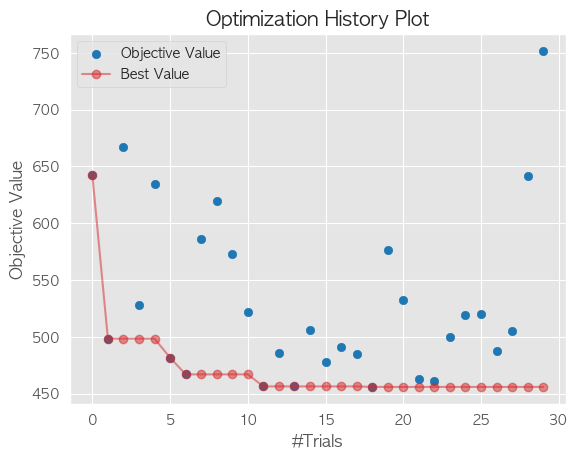

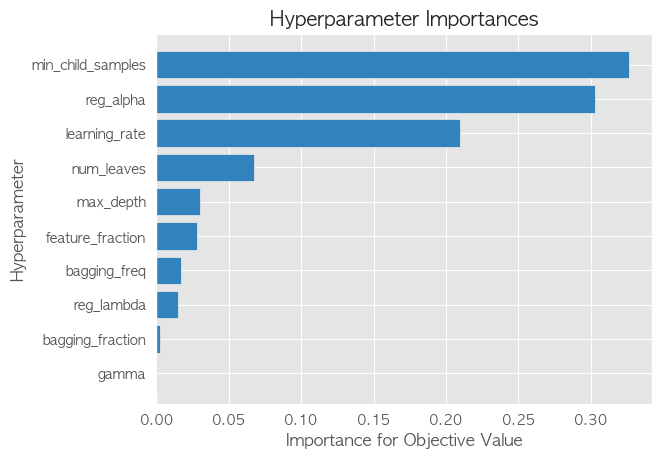

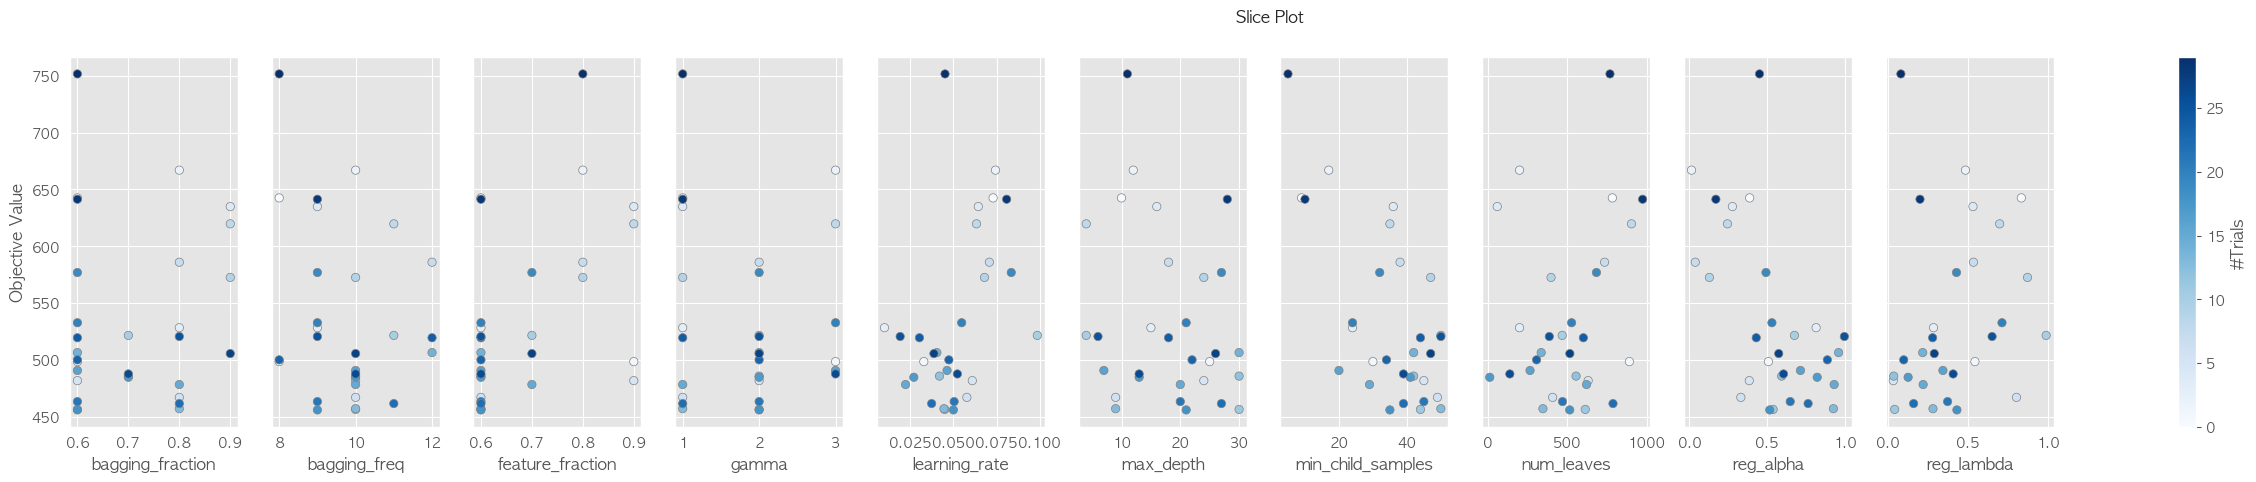

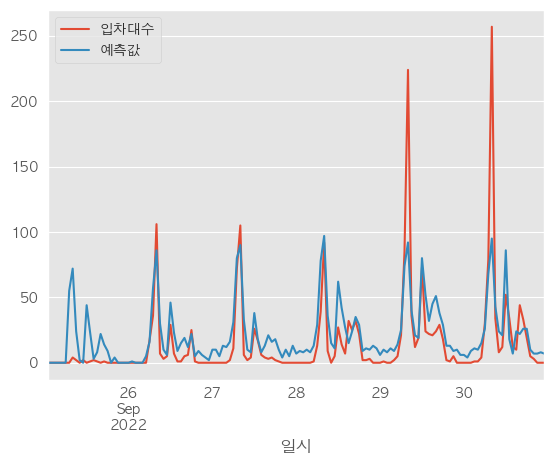

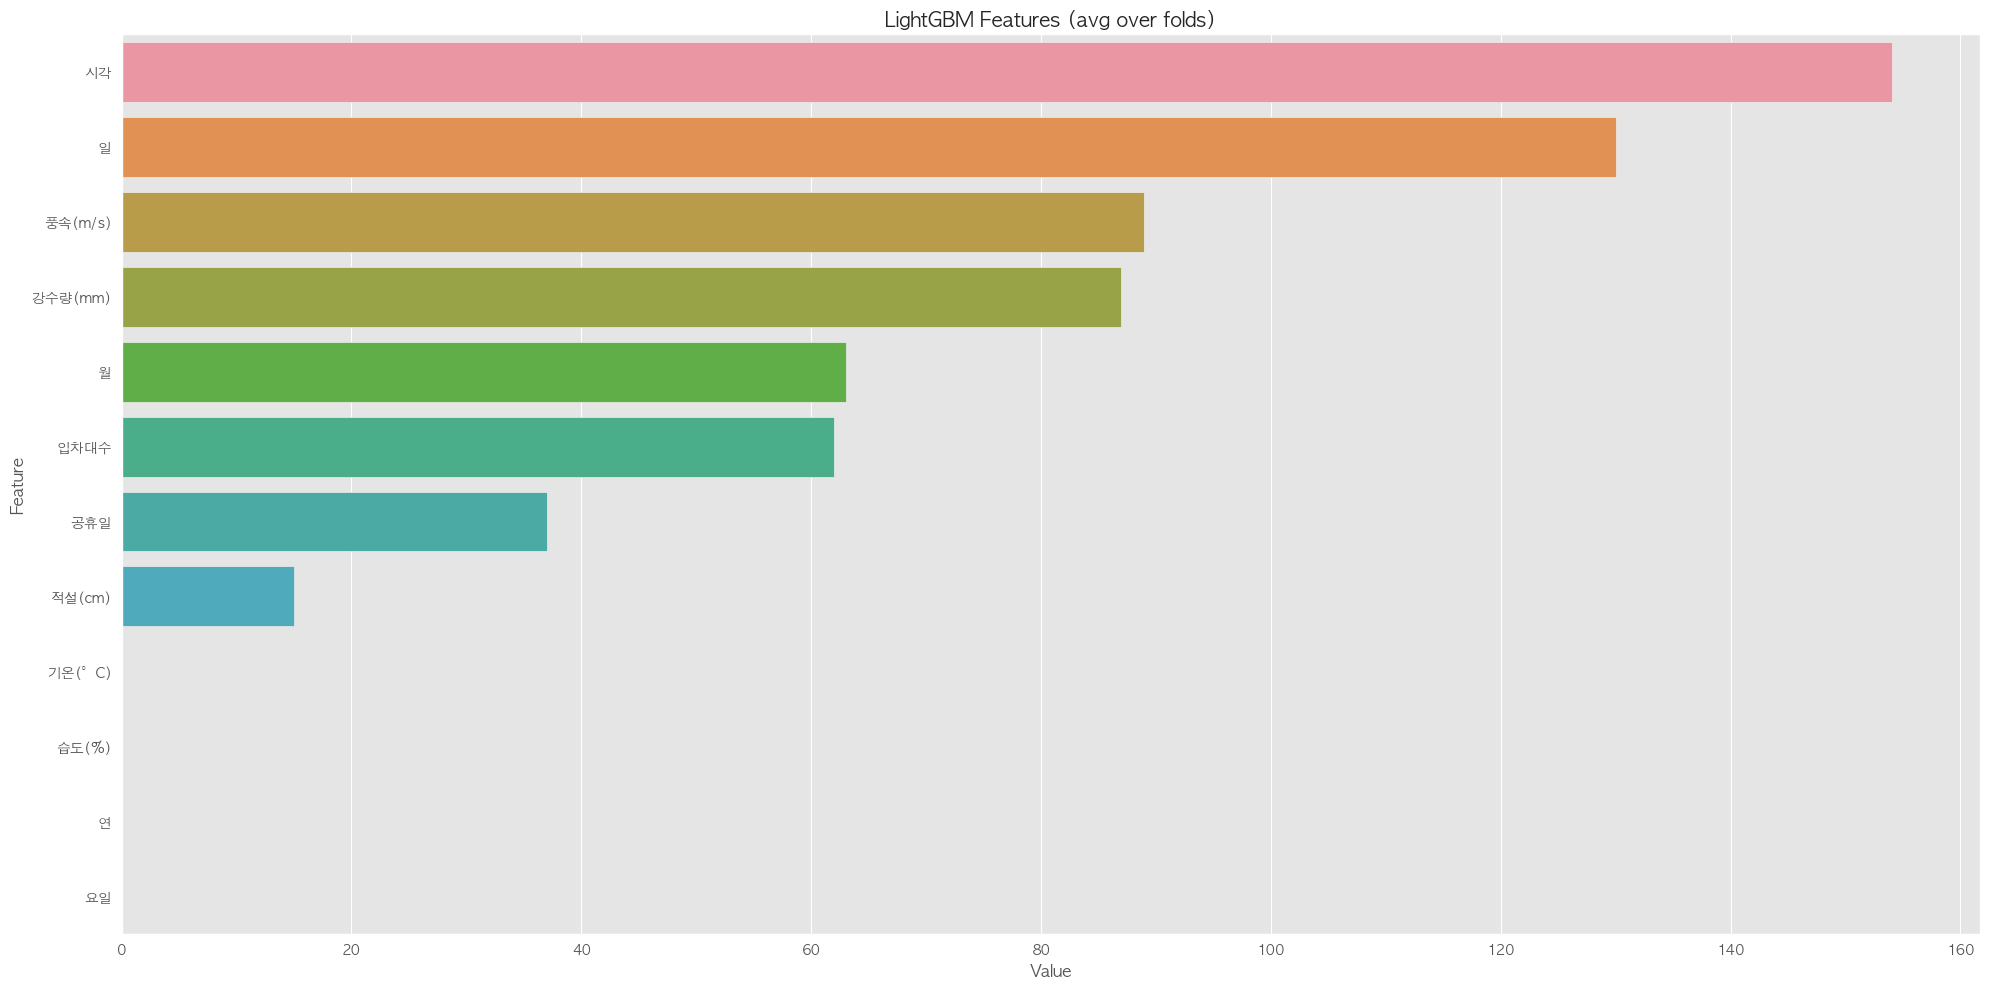

[I 2022-11-23 13:26:02,408] A new study created in memory with name: no-name-c8dc2896-7fec-4dec-9bd2-34dc5ab7d37e


MAE = 12.552447552447552
MAE_per = 84.91012298959319
RMSE = 22.856040807598358
RMSE(per) = inf
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
[I 2022-11-23 13:26:05,531] Trial 0 finished with value: 270.2579049263356 and parameters: {'max_depth': 19, 'num_leaves': 324, 'min_child_samples': 17, 'learning_rate': 0.045981249023072907, 'reg_alpha': 0.5140280970966216, 'reg_lambda': 0.5626387973453503, 'gamma': 1, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 12}. Best is trial 0 with value: 270.2579049263356.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:26:06,666] Trial 1 finished with value: 252.20383175515502 and parameters: {'max_depth': 18, 'num_leaves': 265, 'min_child_samples': 35, 'learning_rate': 0.03419326367161887, 'reg_alpha': 0.6277115952230322, 'reg_lambda': 0.34691950723744835, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.7, 'bagging_freq': 8}. Best is trial 1 with value: 252.20383175515502.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:26:08,764] Trial 2 finished with value: 319.0384361430814 and parameters: {'max_depth': 21, 'num_leaves': 925, 'min_child_samples': 18, 'learning_rate': 0.04162243906958495, 'reg_alpha': 0.6990395127642843, 'reg_lambda': 0.5069921382369589, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 12}. Best is trial 1 with value: 252.20383175515502.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:26:10,329] Trial 3 finished with value: 531.4410838378245 and parameters: {'max_depth': 14, 'num_leaves': 486, 'min_child_samples': 26, 'learning_rate': 0.01116262558479004, 'reg_alpha': 0.959046956850997, 'reg_lambda': 0.06264580603337958, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.7, 'bagging_freq': 11}. Best is trial 1 with value: 252.20383175515502.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:26:11,715] Trial 4 finished with value: 219.43207899708577 and parameters: {'max_depth': 28, 'num_leaves': 157, 'min_child_samples': 33, 'learning_rate': 0.06550958845487806, 'reg_alpha': 0.9424916477191883, 'reg_lambda': 0.3452978584986349, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.8, 'bagging_freq': 11}. Best is trial 4 with value: 219.43207899708577.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:26:12,938] Trial 5 finished with value: 195.81530928027072 and parameters: {'max_depth': 15, 'num_leaves': 346, 'min_child_samples': 34, 'learning_rate': 0.059223973940896416, 'reg_alpha': 0.4690782247453211, 'reg_lambda': 0.8550338540183359, 'gamma': 1, 'feature_fraction': 0.9, 'bagging_fraction': 0.7, 'bagging_freq': 12}. Best is trial 5 with value: 195.81530928027072.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:26:18,873] Trial 6 finished with value: 489.19332534455685 and parameters: {'max_depth': 28, 'num_leaves': 99, 'min_child_samples': 7, 'learning_rate': 0.04971140749858606, 'reg_alpha': 0.39052316072270926, 'reg_lambda': 0.6491749706258109, 'gamma': 1, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 8}. Best is trial 5 with value: 195.81530928027072.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:26:22,123] Trial 7 finished with value: 345.5377898482393 and parameters: {'max_depth': 18, 'num_leaves': 738, 'min_child_samples': 16, 'learning_rate': 0.08187454215310709, 'reg_alpha': 0.34838505428605826, 'reg_lambda': 0.2562453237524458, 'gamma': 1, 'feature_fraction': 0.7, 'bagging_fraction': 0.8, 'bagging_freq': 12}. Best is trial 5 with value: 195.81530928027072.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:26:23,826] Trial 8 finished with value: 346.3802161501773 and parameters: {'max_depth': 14, 'num_leaves': 262, 'min_child_samples': 28, 'learning_rate': 0.015031736078312518, 'reg_alpha': 0.043135662154769334, 'reg_lambda': 0.35942463172164923, 'gamma': 1, 'feature_fraction': 0.9, 'bagging_fraction': 0.7, 'bagging_freq': 12}. Best is trial 5 with value: 195.81530928027072.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:26:24,877] Trial 9 finished with value: 607.5786206571737 and parameters: {'max_depth': 16, 'num_leaves': 625, 'min_child_samples': 34, 'learning_rate': 0.010532174513239137, 'reg_alpha': 0.6215393921034911, 'reg_lambda': 0.36519606935878257, 'gamma': 2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 12}. Best is trial 5 with value: 195.81530928027072.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:25,729] Trial 10 finished with value: 133.79694946613714 and parameters: {'max_depth': 5, 'num_leaves': 7, 'min_child_samples': 50, 'learning_rate': 0.09965473601401828, 'reg_alpha': 0.11561015557620313, 'reg_lambda': 0.9793417933842739, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:26,382] Trial 11 finished with value: 149.42402275401201 and parameters: {'max_depth': 3, 'num_leaves': 63, 'min_child_samples': 50, 'learning_rate': 0.09933849361804922, 'reg_alpha': 0.032715781372498864, 'reg_lambda': 0.9919611839771358, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:27,056] Trial 12 finished with value: 145.82021250809396 and parameters: {'max_depth': 3, 'num_leaves': 14, 'min_child_samples': 50, 'learning_rate': 0.09778709076521187, 'reg_alpha': 0.11336579526559339, 'reg_lambda': 0.9536238590391538, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:27,732] Trial 13 finished with value: 150.94874583180618 and parameters: {'max_depth': 3, 'num_leaves': 5, 'min_child_samples': 50, 'learning_rate': 0.09757294381214403, 'reg_alpha': 0.20473578875578385, 'reg_lambda': 0.796686573238154, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:28,821] Trial 14 finished with value: 154.21240749460935 and parameters: {'max_depth': 8, 'num_leaves': 471, 'min_child_samples': 43, 'learning_rate': 0.08220299907748997, 'reg_alpha': 0.21168019173257782, 'reg_lambda': 0.9775180677056405, 'gamma': 3, 'feature_fraction': 0.8, 'bagging_fraction': 0.9, 'bagging_freq': 9}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:29,854] Trial 15 finished with value: 148.06219822799395 and parameters: {'max_depth': 8, 'num_leaves': 167, 'min_child_samples': 43, 'learning_rate': 0.08363865465306607, 'reg_alpha': 0.19651979480345777, 'reg_lambda': 0.7649717111609167, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:30,897] Trial 16 finished with value: 160.1366276230709 and parameters: {'max_depth': 8, 'num_leaves': 971, 'min_child_samples': 42, 'learning_rate': 0.0711277488597209, 'reg_alpha': 0.11486453982724967, 'reg_lambda': 0.883004414507746, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:31,889] Trial 17 finished with value: 150.9184877170177 and parameters: {'max_depth': 11, 'num_leaves': 26, 'min_child_samples': 45, 'learning_rate': 0.08959960214427262, 'reg_alpha': 0.30217349729448484, 'reg_lambda': 0.6823224050701182, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:33,451] Trial 18 finished with value: 164.95355331156804 and parameters: {'max_depth': 5, 'num_leaves': 191, 'min_child_samples': 39, 'learning_rate': 0.07214041314938051, 'reg_alpha': 0.09894733509813405, 'reg_lambda': 0.9087643847395479, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.9, 'bagging_freq': 9}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:26:34,147] Trial 19 finished with value: 214.77332579761 and parameters: {'max_depth': 23, 'num_leaves': 382, 'min_child_samples': 47, 'learning_rate': 0.09133763296349642, 'reg_alpha': 0.006212816997175644, 'reg_lambda': 0.6947721921651155, 'gamma': 3, 'feature_fraction': 0.8, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:26:35,426] Trial 20 finished with value: 246.95869305649083 and parameters: {'max_depth': 6, 'num_leaves': 645, 'min_child_samples': 38, 'learning_rate': 0.025599919408740745, 'reg_alpha': 0.2820020286105321, 'reg_lambda': 0.9981589365822073, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:36,333] Trial 21 finished with value: 141.15187123763025 and parameters: {'max_depth': 10, 'num_leaves': 179, 'min_child_samples': 50, 'learning_rate': 0.08235380271836679, 'reg_alpha': 0.2063398813442272, 'reg_lambda': 0.7708247485401531, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:37,330] Trial 22 finished with value: 137.81148252760454 and parameters: {'max_depth': 11, 'num_leaves': 103, 'min_child_samples': 48, 'learning_rate': 0.09225687177513503, 'reg_alpha': 0.13991570562352215, 'reg_lambda': 0.808413594607127, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:38,383] Trial 23 finished with value: 147.00821644181912 and parameters: {'max_depth': 11, 'num_leaves': 135, 'min_child_samples': 46, 'learning_rate': 0.07754445975240054, 'reg_alpha': 0.17887095553835347, 'reg_lambda': 0.7693549642437512, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:39,848] Trial 24 finished with value: 152.33510837268628 and parameters: {'max_depth': 11, 'num_leaves': 235, 'min_child_samples': 40, 'learning_rate': 0.09004374941269465, 'reg_alpha': 0.4420618355714081, 'reg_lambda': 0.8290259357781373, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:40,859] Trial 25 finished with value: 147.272157945205 and parameters: {'max_depth': 10, 'num_leaves': 92, 'min_child_samples': 47, 'learning_rate': 0.08997615772426842, 'reg_alpha': 0.2480663656524647, 'reg_lambda': 0.5767373374233612, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:42,736] Trial 26 finished with value: 205.28927701402299 and parameters: {'max_depth': 6, 'num_leaves': 395, 'min_child_samples': 27, 'learning_rate': 0.0615066359809348, 'reg_alpha': 0.12317652845325269, 'reg_lambda': 0.7278767961928465, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 9}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:43,962] Trial 27 finished with value: 159.20185261612897 and parameters: {'max_depth': 12, 'num_leaves': 200, 'min_child_samples': 46, 'learning_rate': 0.07219463280805624, 'reg_alpha': 0.3501540448687318, 'reg_lambda': 0.8988799285481947, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.9, 'bagging_freq': 8}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:26:45,012] Trial 28 finished with value: 208.54161726548145 and parameters: {'max_depth': 9, 'num_leaves': 92, 'min_child_samples': 50, 'learning_rate': 0.09363237132086404, 'reg_alpha': 0.8633838305187141, 'reg_lambda': 0.6224620747557772, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 11}. Best is trial 10 with value: 133.79694946613714.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:46,516] Trial 29 finished with value: 148.48914577519704 and parameters: {'max_depth': 13, 'num_leaves': 294, 'min_child_samples': 37, 'learning_rate': 0.0834082360835648, 'reg_alpha': 0.5585647258332902, 'reg_lambda': 0.49345043626279106, 'gamma': 1, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 10 with value: 133.79694946613714.
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:68: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(studyLGBM)
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:69: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(studyLGBM) # 파라미터 중요도 확인 그래프


study.best_params: 133.79694946613714
Number of finished trials: 30
Best trial: {'max_depth': 5, 'num_leaves': 7, 'min_child_samples': 50, 'learning_rate': 0.09965473601401828, 'reg_alpha': 0.11561015557620313, 'reg_lambda': 0.9793417933842739, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}
study.best_params: {'max_depth': 5, 'num_leaves': 7, 'min_child_samples': 50, 'learning_rate': 0.09965473601401828, 'reg_alpha': 0.11561015557620313, 'reg_lambda': 0.9793417933842739, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 10}


/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:70: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(studyLGBM)
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
MAE = 8.202797202797203
MAE_per = 54.130133825565295
RMSE = 15.117951169138216
RMSE(per) = inf


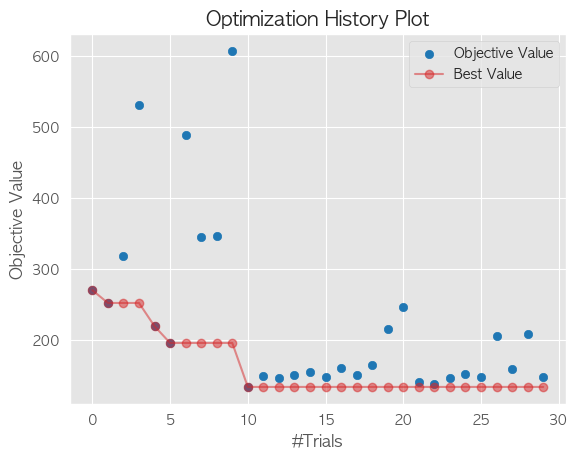

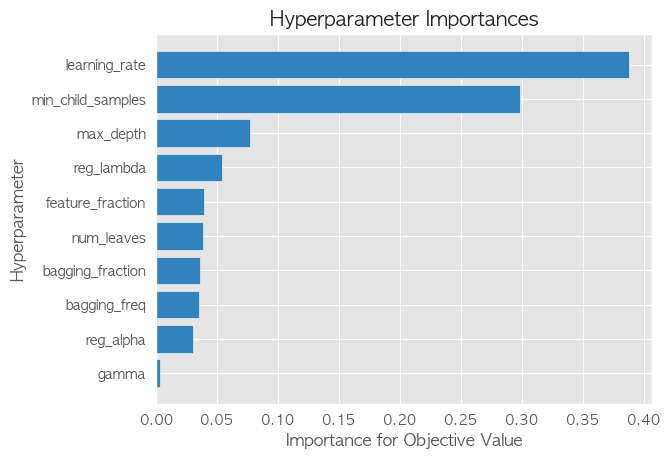

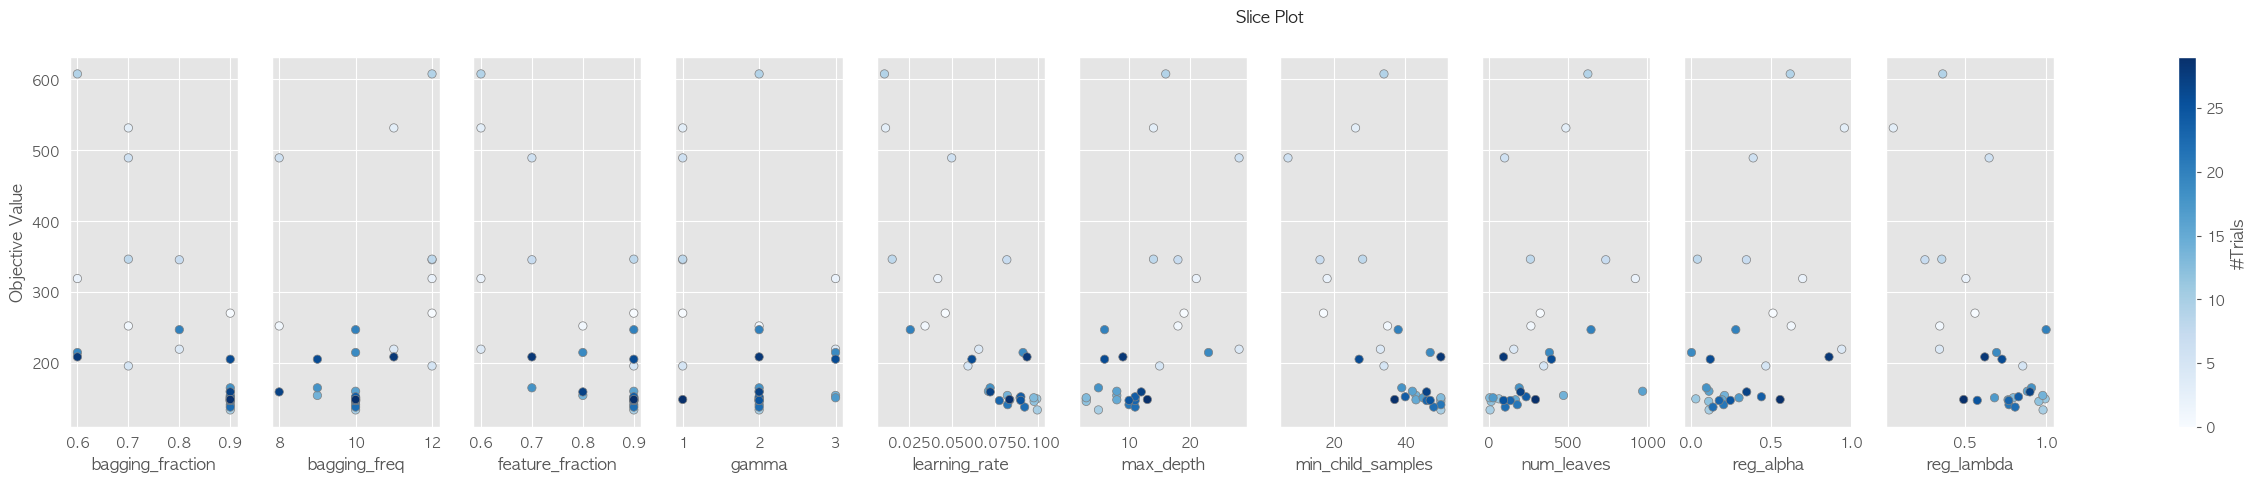

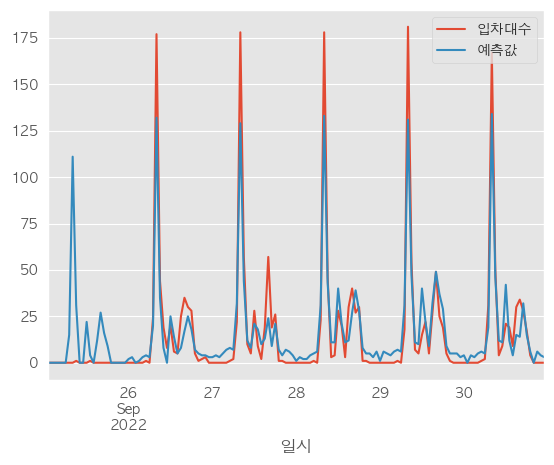

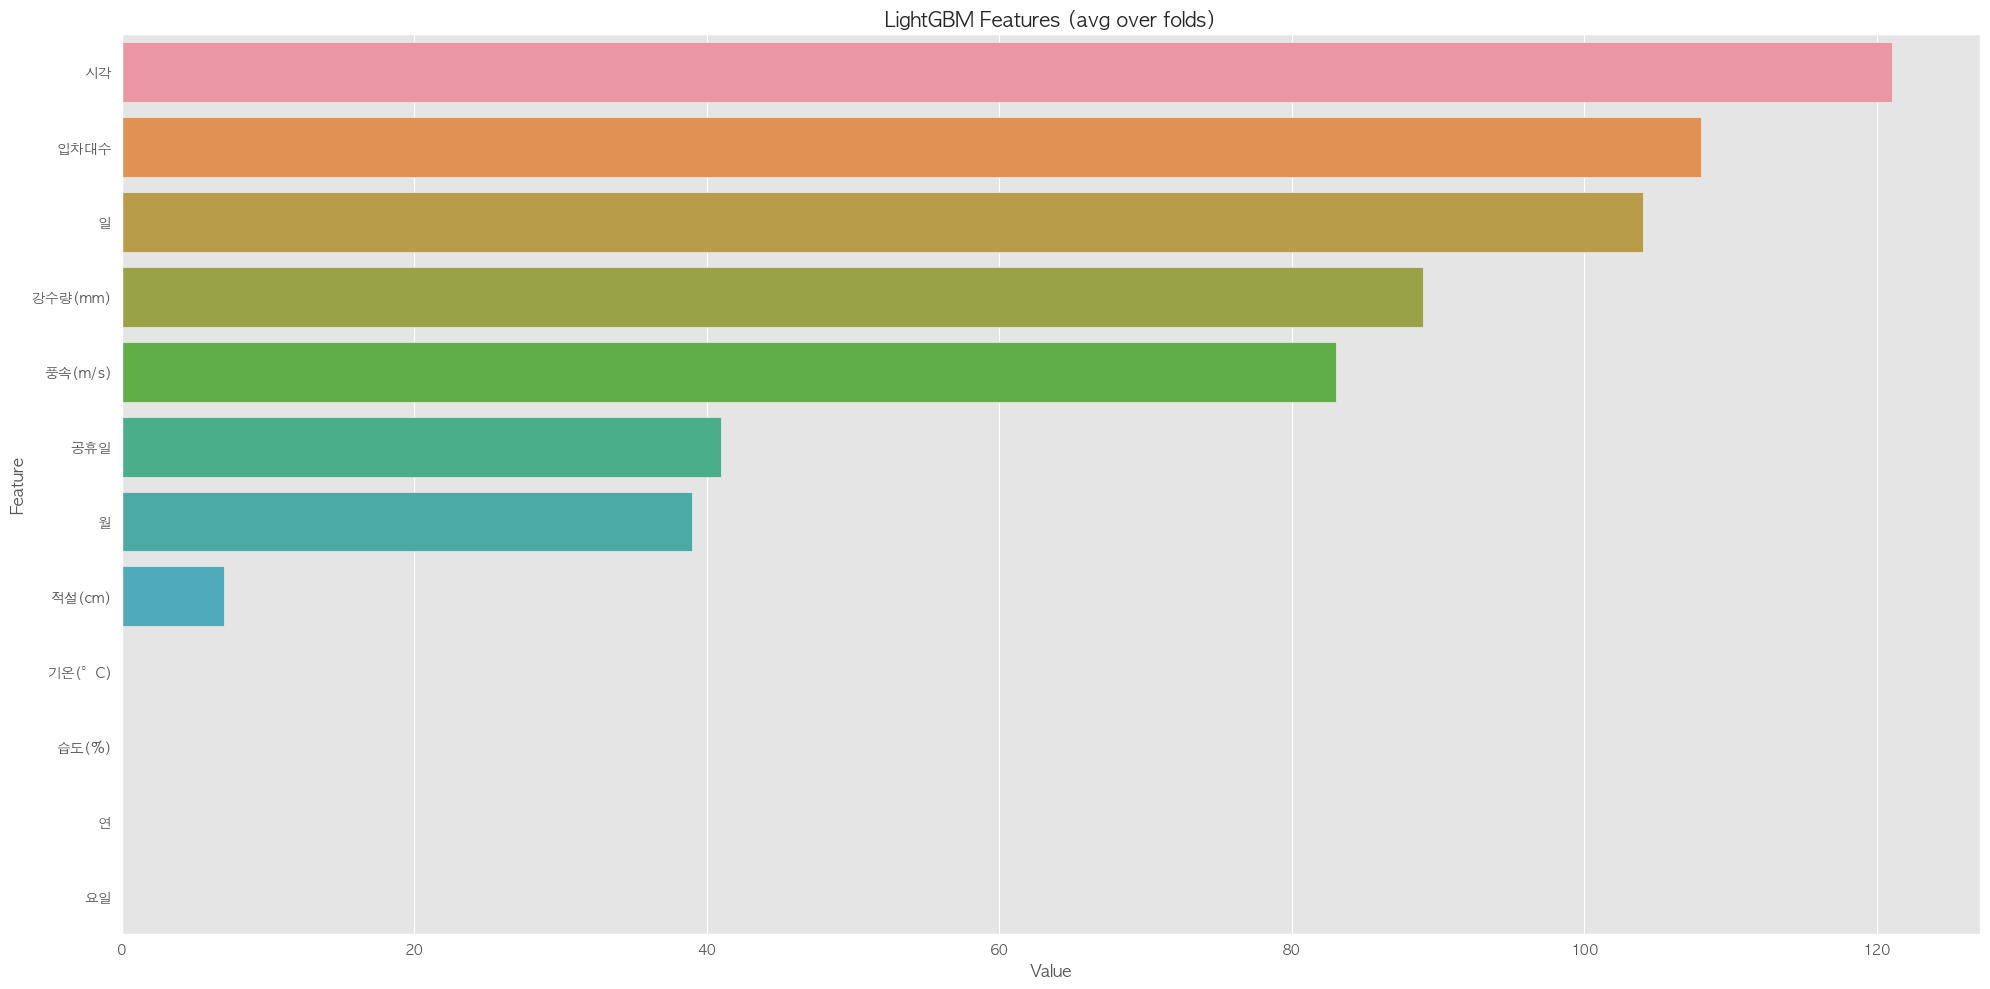

[I 2022-11-23 13:26:47,895] A new study created in memory with name: no-name-2887c23a-0054-4c23-8f74-37fd533291e8


MAE = 8.202797202797203
MAE_per = 54.130133825565295
RMSE = 15.117951169138216
RMSE(per) = inf
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
[I 2022-11-23 13:26:51,271] Trial 0 finished with value: 458.973836798194 and parameters: {'max_depth': 15, 'num_leaves': 32, 'min_child_samples': 15, 'learning_rate': 0.07840377984547761, 'reg_alpha': 0.1412158470090978, 'reg_lambda': 0.7270144534460701, 'gamma': 3, 'feature_fraction': 0.8, 'bagging_fraction': 0.7, 'bagging_freq': 9}. Best is trial 0 with value: 458.973836798194.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:26:52,539] Trial 1 finished with value: 337.5355713280948 and parameters: {'max_depth': 27, 'num_leaves': 76, 'min_child_samples': 41, 'learning_rate': 0.011118234907199123, 'reg_alpha': 0.159379397069445, 'reg_lambda': 0.19514782123106098, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 12}. Best is trial 1 with value: 337.5355713280948.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:55,026] Trial 2 finished with value: 371.6507673623482 and parameters: {'max_depth': 20, 'num_leaves': 686, 'min_child_samples': 25, 'learning_rate': 0.056180940386430976, 'reg_alpha': 0.8339940719502933, 'reg_lambda': 0.6360208800302964, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.9, 'bagging_freq': 10}. Best is trial 1 with value: 337.5355713280948.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:26:57,091] Trial 3 finished with value: 482.89985315993766 and parameters: {'max_depth': 6, 'num_leaves': 558, 'min_child_samples': 27, 'learning_rate': 0.09946602119224797, 'reg_alpha': 0.5393808435333873, 'reg_lambda': 0.5262961924903066, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.8, 'bagging_freq': 12}. Best is trial 1 with value: 337.5355713280948.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:26:58,188] Trial 4 finished with value: 326.812986368704 and parameters: {'max_depth': 25, 'num_leaves': 660, 'min_child_samples': 46, 'learning_rate': 0.043896518952172815, 'reg_alpha': 0.0792126054197596, 'reg_lambda': 0.05301735235539926, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.9, 'bagging_freq': 8}. Best is trial 4 with value: 326.812986368704.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:26:59,377] Trial 5 finished with value: 450.2691890549323 and parameters: {'max_depth': 4, 'num_leaves': 614, 'min_child_samples': 30, 'learning_rate': 0.06352285217014948, 'reg_alpha': 0.8423464303877909, 'reg_lambda': 0.8979920179422118, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 11}. Best is trial 4 with value: 326.812986368704.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:01,635] Trial 6 finished with value: 515.3435024748019 and parameters: {'max_depth': 10, 'num_leaves': 908, 'min_child_samples': 18, 'learning_rate': 0.08467285513219447, 'reg_alpha': 0.5074517666350038, 'reg_lambda': 0.9266525548268862, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 12}. Best is trial 4 with value: 326.812986368704.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:27:02,930] Trial 7 finished with value: 404.9276747489975 and parameters: {'max_depth': 9, 'num_leaves': 630, 'min_child_samples': 37, 'learning_rate': 0.09509805517695454, 'reg_alpha': 0.5446377939158069, 'reg_lambda': 0.34481035691038264, 'gamma': 1, 'feature_fraction': 0.8, 'bagging_fraction': 0.7, 'bagging_freq': 12}. Best is trial 4 with value: 326.812986368704.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:05,048] Trial 8 finished with value: 295.4030886528049 and parameters: {'max_depth': 26, 'num_leaves': 192, 'min_child_samples': 18, 'learning_rate': 0.024889774485762673, 'reg_alpha': 0.5126592763851867, 'reg_lambda': 0.4098385905112808, 'gamma': 3, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 8}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:27:06,244] Trial 9 finished with value: 436.4815728277316 and parameters: {'max_depth': 24, 'num_leaves': 25, 'min_child_samples': 34, 'learning_rate': 0.08679660738326542, 'reg_alpha': 0.9221013885695092, 'reg_lambda': 0.8351118557815846, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.7, 'bagging_freq': 8}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:12,568] Trial 10 finished with value: 386.1176931888503 and parameters: {'max_depth': 18, 'num_leaves': 264, 'min_child_samples': 5, 'learning_rate': 0.022391658630425894, 'reg_alpha': 0.6905828584020811, 'reg_lambda': 0.3873471053397004, 'gamma': 1, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 8}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:27:13,577] Trial 11 finished with value: 308.0846836564601 and parameters: {'max_depth': 30, 'num_leaves': 367, 'min_child_samples': 49, 'learning_rate': 0.03521416459552244, 'reg_alpha': 0.3055015741713865, 'reg_lambda': 0.0010810519613776992, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.9, 'bagging_freq': 8}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:27:16,827] Trial 12 finished with value: 366.60241422838124 and parameters: {'max_depth': 30, 'num_leaves': 339, 'min_child_samples': 17, 'learning_rate': 0.03418300747195127, 'reg_alpha': 0.3478736068846967, 'reg_lambda': 0.07537925552371667, 'gamma': 1, 'feature_fraction': 0.7, 'bagging_fraction': 0.9, 'bagging_freq': 8}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:19,663] Trial 13 finished with value: 344.87916489645806 and parameters: {'max_depth': 30, 'num_leaves': 309, 'min_child_samples': 12, 'learning_rate': 0.03406721779870207, 'reg_alpha': 0.3147194012866978, 'reg_lambda': 0.25125274469627945, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 8}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:20,340] Trial 14 finished with value: 300.1164945606946 and parameters: {'max_depth': 21, 'num_leaves': 415, 'min_child_samples': 50, 'learning_rate': 0.02167195460558199, 'reg_alpha': 0.34728902227550507, 'reg_lambda': 0.4256856920318122, 'gamma': 3, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:21,917] Trial 15 finished with value: 306.2341666456273 and parameters: {'max_depth': 21, 'num_leaves': 167, 'min_child_samples': 22, 'learning_rate': 0.016104102678495644, 'reg_alpha': 0.6455542094181095, 'reg_lambda': 0.4825339217419938, 'gamma': 3, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:25,769] Trial 16 finished with value: 351.7466638134669 and parameters: {'max_depth': 14, 'num_leaves': 459, 'min_child_samples': 8, 'learning_rate': 0.022001403066994538, 'reg_alpha': 0.4065509976975912, 'reg_lambda': 0.5873084974076705, 'gamma': 3, 'feature_fraction': 0.8, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:27,380] Trial 17 finished with value: 342.5597869416711 and parameters: {'max_depth': 23, 'num_leaves': 200, 'min_child_samples': 22, 'learning_rate': 0.044274518693695974, 'reg_alpha': 0.6830514475916135, 'reg_lambda': 0.40417448476625095, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 11}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:28,202] Trial 18 finished with value: 296.4753693938105 and parameters: {'max_depth': 26, 'num_leaves': 462, 'min_child_samples': 40, 'learning_rate': 0.024709109395891708, 'reg_alpha': 0.4205116787163521, 'reg_lambda': 0.22054656252754168, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:28,931] Trial 19 finished with value: 330.8287004300547 and parameters: {'max_depth': 27, 'num_leaves': 818, 'min_child_samples': 42, 'learning_rate': 0.06486165226295483, 'reg_alpha': 0.2268904495884176, 'reg_lambda': 0.21745756452962678, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:27:30,095] Trial 20 finished with value: 374.27132161164593 and parameters: {'max_depth': 27, 'num_leaves': 154, 'min_child_samples': 35, 'learning_rate': 0.04661957169589172, 'reg_alpha': 0.4258755603302688, 'reg_lambda': 0.2778035667998848, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 8 with value: 295.4030886528049.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:30,737] Trial 21 finished with value: 276.03245088696445 and parameters: {'max_depth': 21, 'num_leaves': 440, 'min_child_samples': 50, 'learning_rate': 0.025087339302168856, 'reg_alpha': 0.4392143005880013, 'reg_lambda': 0.46050452357562943, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:31,389] Trial 22 finished with value: 298.16946123014685 and parameters: {'max_depth': 17, 'num_leaves': 460, 'min_child_samples': 44, 'learning_rate': 0.03173741567520682, 'reg_alpha': 0.6005662151381157, 'reg_lambda': 0.12219042940431832, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:32,413] Trial 23 finished with value: 282.7149181232771 and parameters: {'max_depth': 23, 'num_leaves': 528, 'min_child_samples': 31, 'learning_rate': 0.02481055801924942, 'reg_alpha': 0.4552618914261804, 'reg_lambda': 0.32298663551367124, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:33,461] Trial 24 finished with value: 294.5334551507281 and parameters: {'max_depth': 23, 'num_leaves': 735, 'min_child_samples': 31, 'learning_rate': 0.015018945910893644, 'reg_alpha': 0.5012916173664357, 'reg_lambda': 0.5160297031082973, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:34,408] Trial 25 finished with value: 321.1781896265308 and parameters: {'max_depth': 19, 'num_leaves': 797, 'min_child_samples': 31, 'learning_rate': 0.010319472488264252, 'reg_alpha': 0.7340401454616321, 'reg_lambda': 0.7024381678125049, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:35,401] Trial 26 finished with value: 295.73178139873573 and parameters: {'max_depth': 22, 'num_leaves': 989, 'min_child_samples': 32, 'learning_rate': 0.014838797154564348, 'reg_alpha': 0.24688671058470774, 'reg_lambda': 0.5318924701084717, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:36,280] Trial 27 finished with value: 294.34307771733927 and parameters: {'max_depth': 14, 'num_leaves': 778, 'min_child_samples': 38, 'learning_rate': 0.029006247407992434, 'reg_alpha': 0.4480081929612639, 'reg_lambda': 0.3090352957455756, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:27:37,473] Trial 28 finished with value: 327.5128835461443 and parameters: {'max_depth': 13, 'num_leaves': 550, 'min_child_samples': 39, 'learning_rate': 0.04188328827063651, 'reg_alpha': 0.43551926130104784, 'reg_lambda': 0.31455536225636826, 'gamma': 2, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:27:38,436] Trial 29 finished with value: 317.438437379073 and parameters: {'max_depth': 16, 'num_leaves': 536, 'min_child_samples': 45, 'learning_rate': 0.0527480092039099, 'reg_alpha': 0.6175086682501019, 'reg_lambda': 0.3368140139298929, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 21 with value: 276.03245088696445.
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:68: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(studyLGBM)
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:69: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(studyLGBM) # 파라미터 중요도 확인 그래프


study.best_params: 276.03245088696445
Number of finished trials: 30
Best trial: {'max_depth': 21, 'num_leaves': 440, 'min_child_samples': 50, 'learning_rate': 0.025087339302168856, 'reg_alpha': 0.4392143005880013, 'reg_lambda': 0.46050452357562943, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}
study.best_params: {'max_depth': 21, 'num_leaves': 440, 'min_child_samples': 50, 'learning_rate': 0.025087339302168856, 'reg_alpha': 0.4392143005880013, 'reg_lambda': 0.46050452357562943, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}


/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:70: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(studyLGBM)
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
MAE = 9.377622377622378
MAE_per = 118.46289752650176
RMSE = 18.621177507028168
RMSE(per) = inf


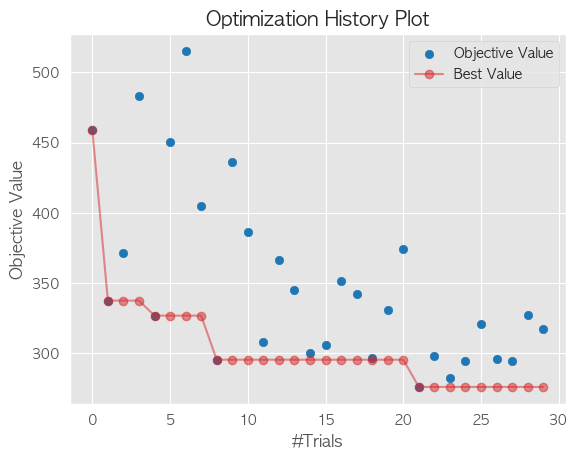

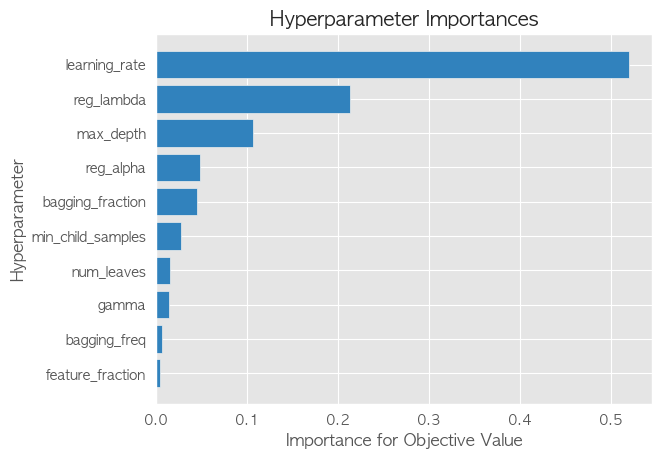

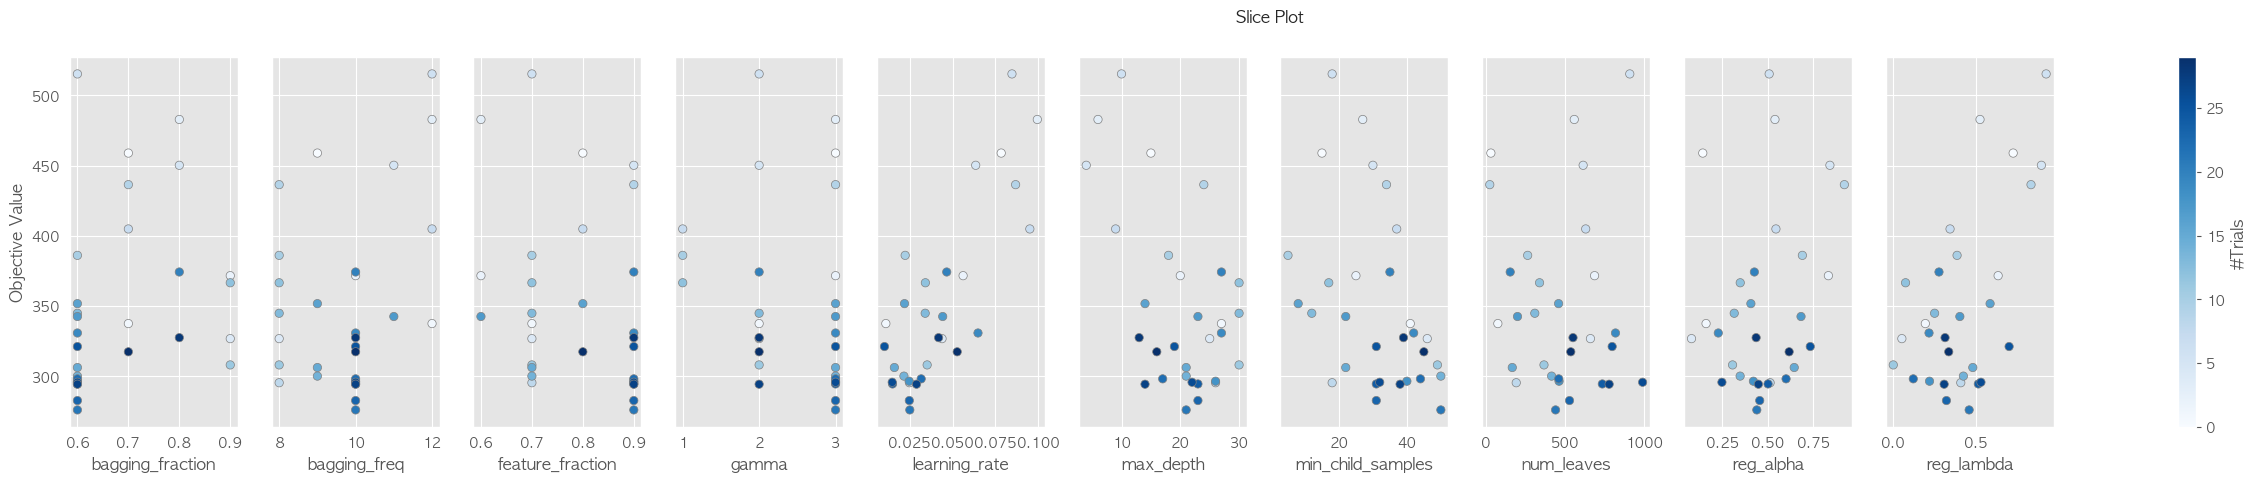

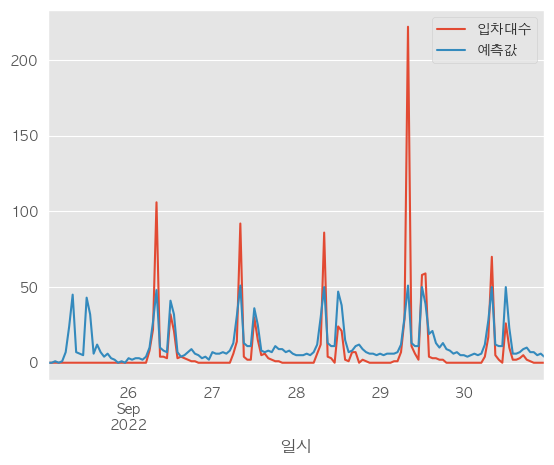

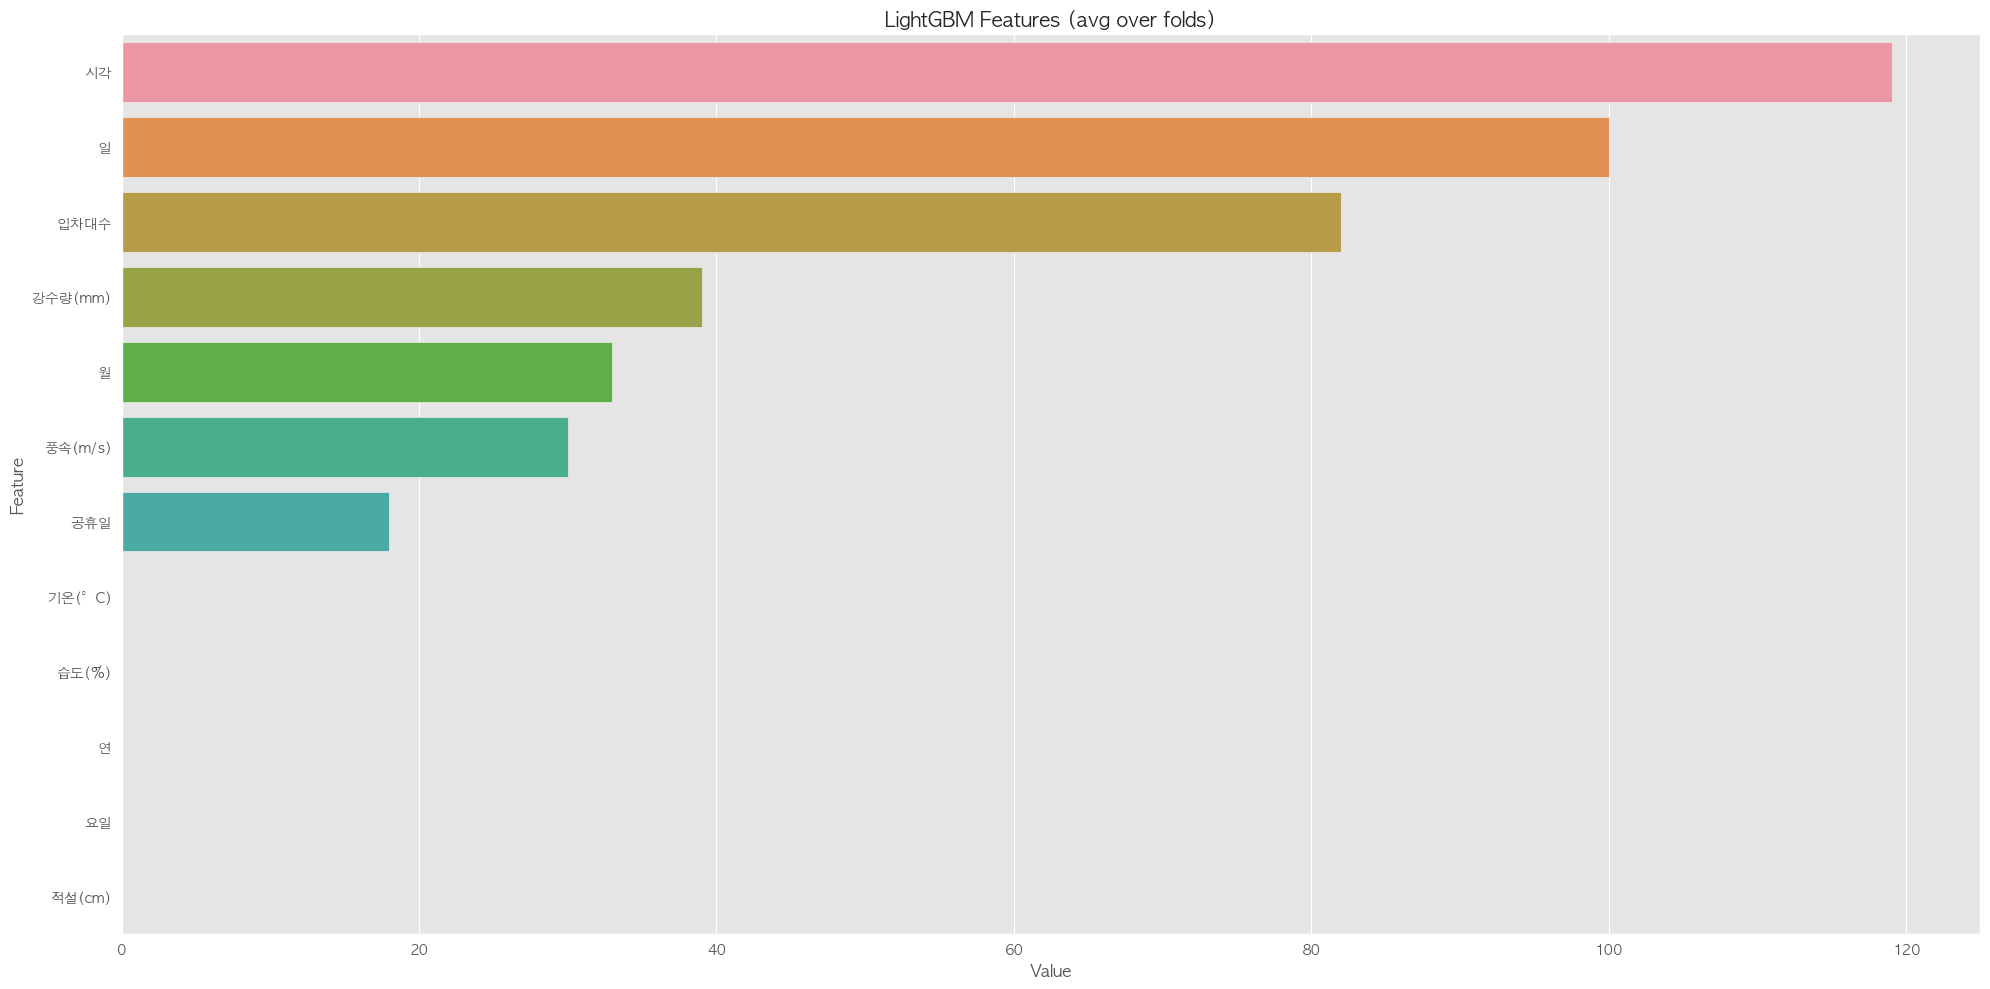

[I 2022-11-23 13:27:39,769] A new study created in memory with name: no-name-1b8c16b4-0b99-4180-bbcb-4820b232f2ff


MAE = 9.377622377622378
MAE_per = 118.46289752650176
RMSE = 18.621177507028168
RMSE(per) = inf
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
[I 2022-11-23 13:27:41,543] Trial 0 finished with value: 104.25123268107153 and parameters: {'max_depth': 9, 'num_leaves': 596, 'min_child_samples': 26, 'learning_rate': 0.04619435908502567, 'reg_alpha': 0.9279703934400383, 'reg_lambda': 0.4387226967765791, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 8}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:27:42,605] Trial 1 finished with value: 150.11135814240873 and parameters: {'max_depth': 27, 'num_leaves': 124, 'min_child_samples': 40, 'learning_rate': 0.042440588617163634, 'reg_alpha': 0.21353338189264873, 'reg_lambda': 0.7156630460599561, 'gamma': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:27:43,480] Trial 2 finished with value: 124.20332240267956 and parameters: {'max_depth': 3, 'num_leaves': 428, 'min_child_samples': 24, 'learning_rate': 0.08376754590625544, 'reg_alpha': 0.1827159800034202, 'reg_lambda': 0.17768693219433476, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.7, 'bagging_freq': 11}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:27:45,902] Trial 3 finished with value: 192.77263651054122 and parameters: {'max_depth': 11, 'num_leaves': 301, 'min_child_samples': 17, 'learning_rate': 0.05839993951318786, 'reg_alpha': 0.9614076489260572, 'reg_lambda': 0.2922130010579068, 'gamma': 1, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 8}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:27:48,690] Trial 4 finished with value: 203.13623511050736 and parameters: {'max_depth': 21, 'num_leaves': 995, 'min_child_samples': 17, 'learning_rate': 0.06906247555049208, 'reg_alpha': 0.6258328249170738, 'reg_lambda': 0.5775278378866211, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.9, 'bagging_freq': 8}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:27:49,662] Trial 5 finished with value: 139.02346555700632 and parameters: {'max_depth': 9, 'num_leaves': 997, 'min_child_samples': 39, 'learning_rate': 0.048581726318908384, 'reg_alpha': 0.16013026125165553, 'reg_lambda': 0.6078325675300494, 'gamma': 3, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'bagging_freq': 9}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:27:52,468] Trial 6 finished with value: 194.213928035913 and parameters: {'max_depth': 16, 'num_leaves': 855, 'min_child_samples': 16, 'learning_rate': 0.04295892587372432, 'reg_alpha': 0.8753489865668683, 'reg_lambda': 0.19935289395679584, 'gamma': 2, 'feature_fraction': 0.7, 'bagging_fraction': 0.8, 'bagging_freq': 12}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:27:54,595] Trial 7 finished with value: 182.27851037160414 and parameters: {'max_depth': 17, 'num_leaves': 816, 'min_child_samples': 20, 'learning_rate': 0.08767470271032769, 'reg_alpha': 0.048350604520376816, 'reg_lambda': 0.030452704897509453, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.8, 'bagging_freq': 8}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:27:57,997] Trial 8 finished with value: 259.81905728474834 and parameters: {'max_depth': 16, 'num_leaves': 32, 'min_child_samples': 14, 'learning_rate': 0.09089287897437058, 'reg_alpha': 0.21516076966998268, 'reg_lambda': 0.7307433973296245, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 8}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


[I 2022-11-23 13:28:00,484] Trial 9 finished with value: 135.10335714591778 and parameters: {'max_depth': 7, 'num_leaves': 300, 'min_child_samples': 20, 'learning_rate': 0.0388626729399503, 'reg_alpha': 0.06949625385673368, 'reg_lambda': 0.221149088627141, 'gamma': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.9, 'bagging_freq': 12}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:01,573] Trial 10 finished with value: 198.59679735058765 and parameters: {'max_depth': 3, 'num_leaves': 632, 'min_child_samples': 32, 'learning_rate': 0.013290065551243617, 'reg_alpha': 0.6916835783820613, 'reg_lambda': 0.4203265552448575, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 9}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:28:02,822] Trial 11 finished with value: 227.66846088932138 and parameters: {'max_depth': 3, 'num_leaves': 536, 'min_child_samples': 5, 'learning_rate': 0.07230975557133108, 'reg_alpha': 0.4196931530987209, 'reg_lambda': 0.02986463193888239, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.7, 'bagging_freq': 11}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:28:03,741] Trial 12 finished with value: 233.3801289931576 and parameters: {'max_depth': 7, 'num_leaves': 378, 'min_child_samples': 50, 'learning_rate': 0.017940294179354818, 'reg_alpha': 0.4143098026466916, 'reg_lambda': 0.39521731818852673, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.6, 'bagging_freq': 11}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:05,298] Trial 13 finished with value: 125.02079975067926 and parameters: {'max_depth': 12, 'num_leaves': 571, 'min_child_samples': 28, 'learning_rate': 0.02932593577244329, 'reg_alpha': 0.7386992053358641, 'reg_lambda': 0.8441056979041872, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 11}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:28:06,232] Trial 14 finished with value: 108.26948187287842 and parameters: {'max_depth': 3, 'num_leaves': 713, 'min_child_samples': 28, 'learning_rate': 0.07291538892393495, 'reg_alpha': 0.5414015982247316, 'reg_lambda': 0.3292879292848526, 'gamma': 2, 'feature_fraction': 0.8, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 0 with value: 104.25123268107153.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:28:07,531] Trial 15 finished with value: 98.61244484973842 and parameters: {'max_depth': 7, 'num_leaves': 721, 'min_child_samples': 35, 'learning_rate': 0.05890476661826534, 'reg_alpha': 0.5052050495466679, 'reg_lambda': 0.4599269574550619, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 15 with value: 98.61244484973842.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:08,710] Trial 16 finished with value: 86.1120770385514 and parameters: {'max_depth': 13, 'num_leaves': 732, 'min_child_samples': 37, 'learning_rate': 0.05968040847489252, 'reg_alpha': 0.8026532169822177, 'reg_lambda': 0.9871347988105116, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


[I 2022-11-23 13:28:09,716] Trial 17 finished with value: 126.70373420746701 and parameters: {'max_depth': 21, 'num_leaves': 749, 'min_child_samples': 38, 'learning_rate': 0.06013717714425131, 'reg_alpha': 0.8020213917645127, 'reg_lambda': 0.9861473968603844, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:28:10,596] Trial 18 finished with value: 110.65867402294636 and parameters: {'max_depth': 14, 'num_leaves': 885, 'min_child_samples': 49, 'learning_rate': 0.06291062780333616, 'reg_alpha': 0.5295335415210075, 'reg_lambda': 0.984948115442835, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:12,127] Trial 19 finished with value: 118.83211099196032 and parameters: {'max_depth': 20, 'num_leaves': 689, 'min_child_samples': 33, 'learning_rate': 0.030522215101594263, 'reg_alpha': 0.3436791998784152, 'reg_lambda': 0.5844648226297693, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


[I 2022-11-23 13:28:13,021] Trial 20 finished with value: 112.54095132259805 and parameters: {'max_depth': 30, 'num_leaves': 447, 'min_child_samples': 43, 'learning_rate': 0.0797104612723788, 'reg_alpha': 0.8366686301654881, 'reg_lambda': 0.8578336642590918, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.7, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:14,574] Trial 21 finished with value: 92.33538026732768 and parameters: {'max_depth': 9, 'num_leaves': 610, 'min_child_samples': 34, 'learning_rate': 0.0532060324822807, 'reg_alpha': 0.9978078127121249, 'reg_lambda': 0.4625566580677394, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:15,967] Trial 22 finished with value: 89.68633256145404 and parameters: {'max_depth': 7, 'num_leaves': 793, 'min_child_samples': 33, 'learning_rate': 0.056974051669808186, 'reg_alpha': 0.9962922558246896, 'reg_lambda': 0.48422737555496126, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:16,868] Trial 23 finished with value: 104.98800243875338 and parameters: {'max_depth': 11, 'num_leaves': 805, 'min_child_samples': 45, 'learning_rate': 0.04945985350557482, 'reg_alpha': 0.9955844527774759, 'reg_lambda': 0.5469513271525841, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:18,600] Trial 24 finished with value: 100.48305985874921 and parameters: {'max_depth': 13, 'num_leaves': 646, 'min_child_samples': 31, 'learning_rate': 0.052489593827902914, 'reg_alpha': 0.8876285916862064, 'reg_lambda': 0.6665843503345102, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:19,749] Trial 25 finished with value: 86.43098102817086 and parameters: {'max_depth': 6, 'num_leaves': 909, 'min_child_samples': 36, 'learning_rate': 0.065324601108012, 'reg_alpha': 0.7793305763066561, 'reg_lambda': 0.5030280618759231, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 10}. Best is trial 16 with value: 86.1120770385514.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:20,885] Trial 26 finished with value: 84.75720250564981 and parameters: {'max_depth': 6, 'num_leaves': 887, 'min_child_samples': 37, 'learning_rate': 0.0676180615901554, 'reg_alpha': 0.7575883995737482, 'reg_lambda': 0.8160140426012155, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 9}. Best is trial 26 with value: 84.75720250564981.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:21,799] Trial 27 finished with value: 93.28485287080059 and parameters: {'max_depth': 5, 'num_leaves': 893, 'min_child_samples': 45, 'learning_rate': 0.0687067854160638, 'reg_alpha': 0.6503055140793316, 'reg_lambda': 0.8740562274337245, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 9}. Best is trial 26 with value: 84.75720250564981.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:22,870] Trial 28 finished with value: 80.74196720890698 and parameters: {'max_depth': 5, 'num_leaves': 957, 'min_child_samples': 37, 'learning_rate': 0.07784994943003831, 'reg_alpha': 0.75707710683654, 'reg_lambda': 0.8129297233151274, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 9}. Best is trial 28 with value: 80.74196720890698.
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


[I 2022-11-23 13:28:24,119] Trial 29 finished with value: 82.155038576156 and parameters: {'max_depth': 9, 'num_leaves': 923, 'min_child_samples': 40, 'learning_rate': 0.09800497201656456, 'reg_alpha': 0.6191036229596917, 'reg_lambda': 0.7805697830325193, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 9}. Best is trial 28 with value: 80.74196720890698.
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:68: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(studyLGBM)
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:69: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(studyLGBM) # 파라미터 중요도 확인 그래프


study.best_params: 80.74196720890698
Number of finished trials: 30
Best trial: {'max_depth': 5, 'num_leaves': 957, 'min_child_samples': 37, 'learning_rate': 0.07784994943003831, 'reg_alpha': 0.75707710683654, 'reg_lambda': 0.8129297233151274, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 9}
study.best_params: {'max_depth': 5, 'num_leaves': 957, 'min_child_samples': 37, 'learning_rate': 0.07784994943003831, 'reg_alpha': 0.75707710683654, 'reg_lambda': 0.8129297233151274, 'gamma': 3, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 9}


/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71423/4137262921.py:70: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(studyLGBM)
/Users/keumhyeonjun/opt/anaconda3/envs/행안부/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
MAE = 5.909090909090909
MAE_per = 42.14463840399002
RMSE = 11.347961216721874
RMSE(per) = inf


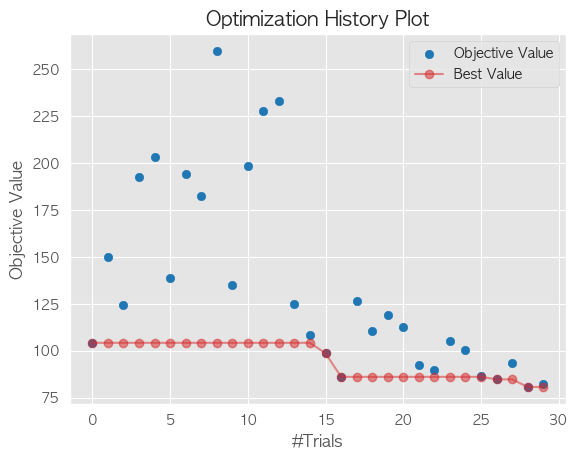

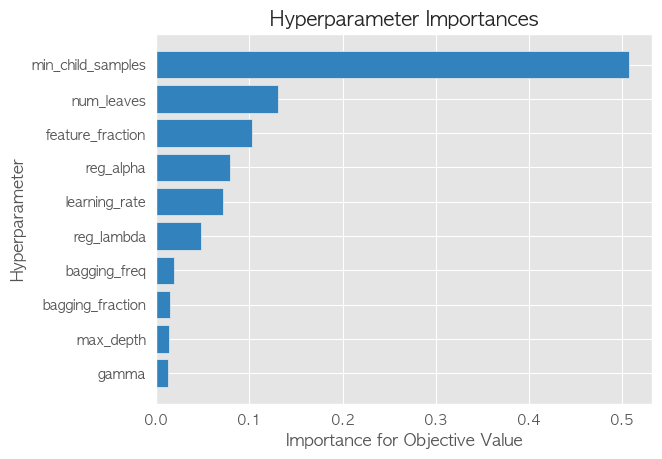

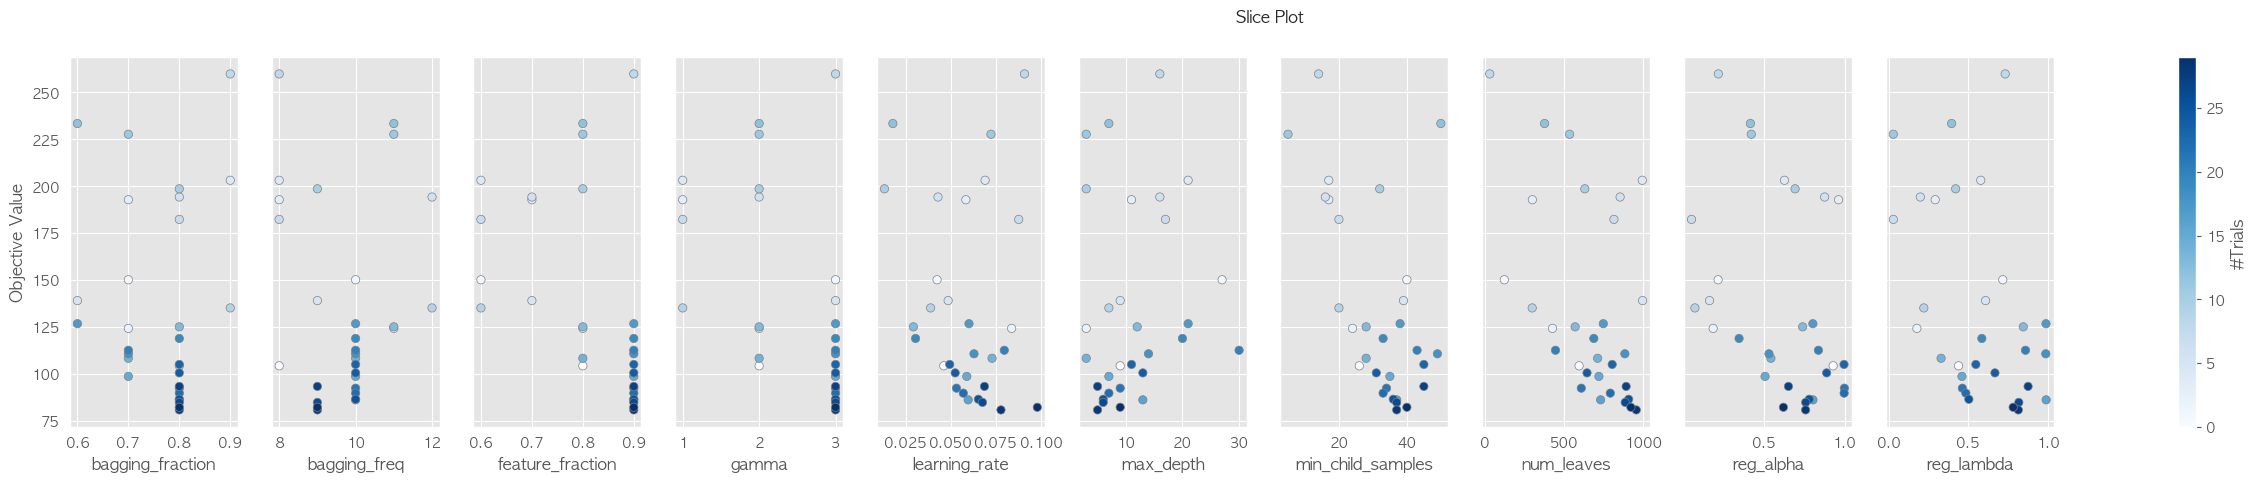

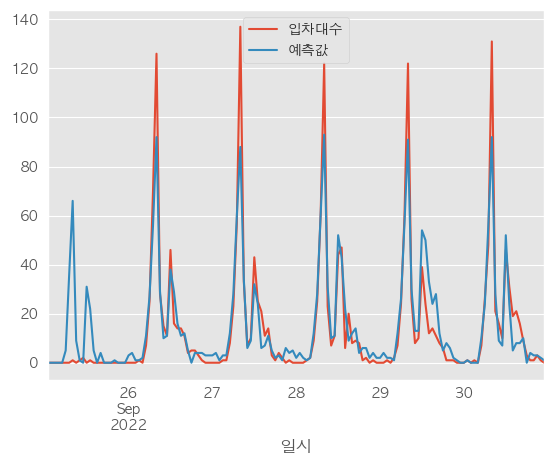

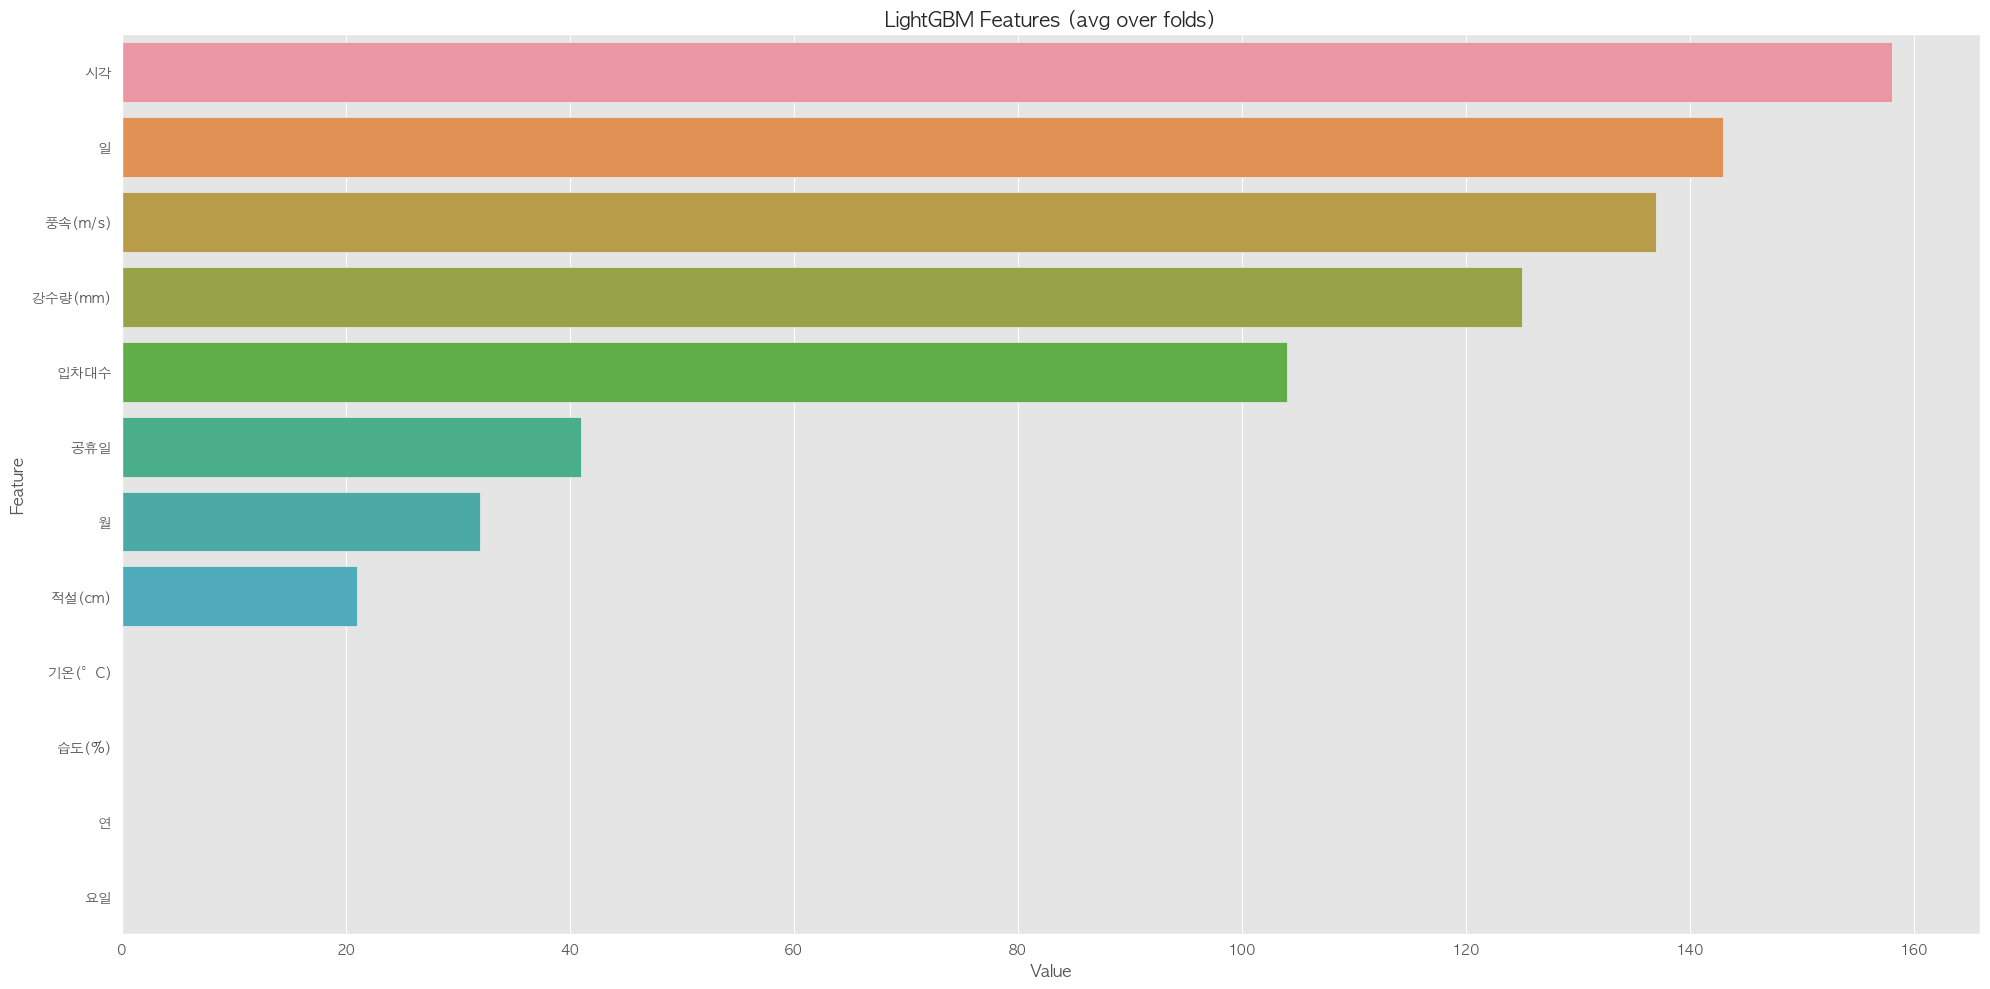

MAE = 5.909090909090909
MAE_per = 42.14463840399002
RMSE = 11.347961216721874
RMSE(per) = inf


In [45]:
for parking in arr:
    input_data = dataset[dataset['주차장'] == parking]

    input_data = input_data[['일시','입차대수','시각','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)','공휴일','요일','연','월','일']]
    input_data = input_data.set_index('일시')
    CATEGORICAL_COLUMN = ['공휴일','요일','시각']

    input_data['트렌드'] = range(0,0+len(input_data))
    input_data
    # 하이퍼파라미터 튜닝
    import optuna
    from lightgbm import LGBMRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    from lightgbm import LGBMRegressor
    from datetime import datetime


    train_dataset = input_data[input_data.index < datetime(2022, 9, 25)]
    train_x = train_dataset.iloc[:, 1:]
    train_y = train_dataset.iloc[:, 0]

    test_dataset = input_data[input_data.index > datetime(2022, 9, 25)]
    test_x = test_dataset.iloc[:, 1:]
    test_y = test_dataset.iloc[:, 0]
    params = {'learning_rate': 0.01,
              'max_depth': 20,
              'boosting': 'gbdt',
              'objective': 'regression',
              'metric': 'mse',
              'is_training_metric': True,
              'num_leaves': 169,
              'feature_fraction': 0.9,
              'bagging_fraction': 0.7,
              'bagging_freq': 10,
              'n_estimators' : 500,
              'seed':1111}
    def objective(trial):
        param = {
            'max_depth' : trial.suggest_int('max_depth', 3, 30),
            'num_leaves' : trial.suggest_int('num_leaves', 2, 1000),
            'min_child_samples':trial.suggest_int('min_child_samples',5,50 ),
            'learning_rate':trial.suggest_uniform('learning_rate', 0.01,0.1),
            'n_estimators' :300,
            'reg_alpha':trial.suggest_uniform('reg_alpha', 0.001,1),
            'reg_lambda':trial.suggest_uniform('reg_lambda', 0.001,1),
            'gamma' : trial.suggest_int('gamma', 1, 3),
            'metric' : 'mse',
            'feature_fraction' :  trial.suggest_categorical('feature_fraction', [0.6,0.7,0.8,0.9]),
            'bagging_fraction' :  trial.suggest_categorical('bagging_fraction', [0.6,0.7,0.8,0.9]),
            'bagging_freq' :  trial.suggest_categorical('bagging_freq', [8,9,10,11,12])
        }

        lgbm_reg = LGBMRegressor(**param)
        lgbm_reg.fit(train_x,train_y,categorical_feature =CATEGORICAL_COLUMN,verbose=False)
        pred = lgbm_reg.predict(test_x)
        score = mean_squared_error(test_y, pred)
        return score

    studyLGBM = optuna.create_study(direction='minimize')
    studyLGBM.optimize(lambda trial : objective(trial), n_trials = 30)

    print('study.best_params:', studyLGBM.best_trial.value)
    print('Number of finished trials:', len(studyLGBM.trials))
    print('Best trial:', studyLGBM.best_trial.params)
    print('study.best_params:', studyLGBM.best_params)
    parameter = studyLGBM.best_params
    parameter
    optuna.visualization.matplotlib.plot_optimization_history(studyLGBM)
    optuna.visualization.matplotlib.plot_param_importances(studyLGBM) # 파라미터 중요도 확인 그래프
    optuna.visualization.matplotlib.plot_slice(studyLGBM)

    model = LGBMRegressor(**parameter)
    model.fit(train_x, train_y, categorical_feature =CATEGORICAL_COLUMN, verbose=100)
    predict_test = model.predict(test_x)
    for i in range(len(predict_test)):
        if predict_test[i] < 0 :
            predict_test[i] = 0
        else :
            predict_test[i] = predict_test[i].round(0)
    predict_test
    MAE = mean_absolute_error(test_y, predict_test)
    MAE_per = sum(abs(test_y - predict_test)) / sum(test_y) * 100
    print('MAE =', MAE)
    print('MAE_per =', MAE_per)
    RMSE = np.sqrt(mean_squared_error(test_y, predict_test))
    RMSE_per = (np.sqrt(np.mean(np.square((test_y - predict_test) / test_y)))) * 100
    print('RMSE =', RMSE)
    print('RMSE(per) =', RMSE_per)


    pd.concat([test_y, pd.Series(predict_test, index=test_y.index, name='예측값')], axis=1).plot()
    result = pd.concat([test_y, pd.Series(predict_test, index=test_y.index, name='예측값')], axis=1)


    result.to_excel(f'결과_정기권_{parking}.xlsx')


    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,input_data.columns)), columns=['Value','Feature'])

    plt.figure(figsize=(20, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

    print('MAE =', MAE)
    print('MAE_per =', MAE_per)
    print('RMSE =', RMSE)
    print('RMSE(per) =', RMSE_per)